
Dataset Sample:
                                              review  sentiment  \
0  So i consider myself pretty big into the anime...          1   
1  Nell Shipman attempted a plot to lead up to a ...          0   
2  I'm not a fan of the Left Behind book series -...          0   
3  My mom and I have just recently become addicte...          1   
4  I got the first Bill and Ted movie for christm...          1   

                                      cleaned_review  
0  so i consider myself pretty big into the anime...  
1  nell shipman attempted a plot to lead up to a ...  
2  im not a fan of the left behind book series  t...  
3  my mom and i have just recently become addicte...  
4  i got the first bill and ted movie for christm...  


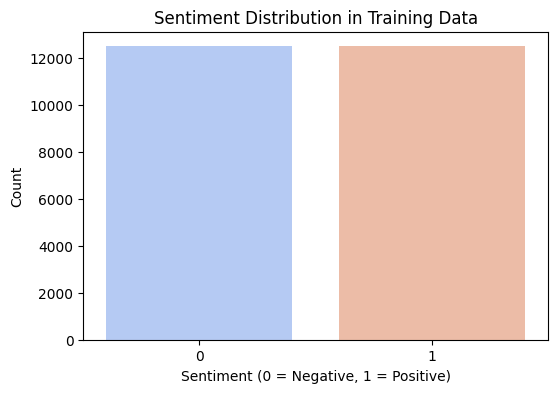


Model Accuracy: 0.8823

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



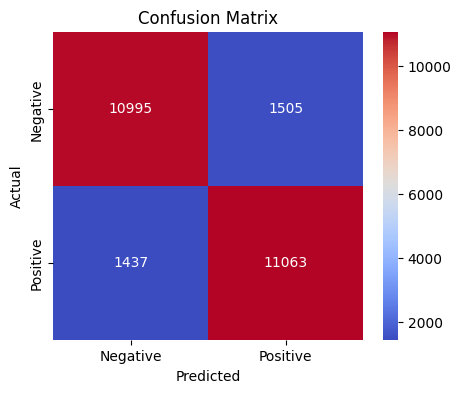


Model Training and Evaluation Complete!


In [ ]:
# SENTIMENT ANALYSIS USING TF-IDF & LOGISTIC REGRESSION

# IMPORT LIBRARIES
import os
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
from google.colab import drive


# Define dataset paths
train_pos_path = "/content/dataset/aclImdb/train/pos"
train_neg_path = "/content/dataset/aclImdb/train/neg"
test_pos_path = "/content/dataset/aclImdb/test/pos"
test_neg_path = "/content/dataset/aclImdb/test/neg"

# DATA LOADING FUNCTION
def load_reviews_from_folder(folder, label):
    reviews = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            reviews.append(file.read())
    return pd.DataFrame({"review": reviews, "sentiment": label})

# Load and label train/test data
train_pos = load_reviews_from_folder(train_pos_path, 1)  # Positive = 1
train_neg = load_reviews_from_folder(train_neg_path, 0)  # Negative = 0
test_pos = load_reviews_from_folder(test_pos_path, 1)
test_neg = load_reviews_from_folder(test_neg_path, 0)

# Combine positive and negative reviews
df_train = pd.concat([train_pos, train_neg]).sample(frac=1).reset_index(drop=True)
df_test = pd.concat([test_pos, test_neg]).sample(frac=1).reset_index(drop=True)

# PREPROCESSING: CLEANING TEXT
def clean_text(text):
    """Cleans text by lowercasing, removing punctuation, and numbers"""
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text.strip()

# Apply cleaning function
df_train['cleaned_review'] = df_train['review'].apply(clean_text)
df_test['cleaned_review'] = df_test['review'].apply(clean_text)

# EXPLORATORY DATA ANALYSIS (EDA)
print("\nDataset Sample:")
print(df_train.head())

# Visualize Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df_train['sentiment'], hue=df_train['sentiment'], palette="coolwarm", legend=False)
plt.title("Sentiment Distribution in Training Data")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# FEATURE EXTRACTION: TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_review'])
X_test_tfidf = vectorizer.transform(df_test['cleaned_review'])

# MODEL TRAINING: LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(X_train_tfidf, df_train['sentiment'])

# MODEL EVALUATION: ACCURACY, CLASSIFICATION REPORT, CONFUSION MATRIX
y_pred = model.predict(X_test_tfidf)

# Accuracy Score
accuracy = accuracy_score(df_test['sentiment'], y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(df_test['sentiment'], y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(df_test['sentiment'], y_pred), annot=True, fmt='d', cmap='coolwarm', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# FINAL NOTES
print("\nModel Training and Evaluation Complete!")

